# Some Numpy and Matplotlib Problems #

Complete each of the following **using appropriate numpy functions and operations**.  The main numpy API reference is available [here](https://numpy.org/doc/stable/reference/).  It may or may not be useful. 

1. Consider the matrix $ A = \left( \matrix{ 2 & 5 & 0 & 8 \cr 1 & 4 & 2 & 6 \cr 7 & 8 & 9 & 3 \cr 1 & 5 & 7 & 8 \cr}\right)$ and let $b = \left( \matrix{ 4 \cr 2 \cr 1 \cr 1 \cr}\right)$. 

+ Find the determinant of $A$ and exaplain why $A$ has an inverse.
+ Find the inverse of the matrix $A$
+ Solve th equation $A x = b$ for the vector $x$

2. Produce a plot of each of the following functions on an appropriate interval

+  $f(x) = \ln(x)/x^2$
+  $f(x) = \tan^{-1}(x^2)$

3. The file jan8data.npy on the [class github page](https://github.com/aleahy-work/CS-STAT323-W24) contains several hundred observations of a (single-variable) random variable.  See [this page](https://numpy.org/doc/stable/reference/routines.io.html) for instructions on how to load the data into a numpy array.

+ Produce a **density** (or relatively frequency) histogram of the data (as opposed to a *frequency* histogram).  (You should use matplotlib, but note from the [matplotlib documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) that a numpy command is being used in the background!)
+ Find the mean and the standard deviation of the data. (Use numpy functions.)
+ Hopefully, your previous answers convince you that this data is drawn from a *normal* random variable.  A normal random variable is a random variable with the probability density function is given by $ f(x) =  {1 \over \sigma \sqrt{2 \pi}} e^{-{1\over 2} \left({x - \mu \over \sigma}\right)^2}$, where $\mu$ is the *population* mean and $\sigma$ is the *population* standard deviation.  The Central Limit Theorem says that $\bar x \approx \mu$ and $s \approx \sigma$.  Use this fact (and Matplotlib) to produce a plot of your histogram together with the graph of the estimated probability density.

4. [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) is an iterative algorithm which uses the derivative to estimate a solution $x_n$ to an equation $f(x) = 0$, given a starting estimate $x_0$ for the solution and the derivative $f'(x)$ of the function. This algorithm is usually discussed in introductory calculus. Consider the function $f(x) = \sin(x) + x - 1$.

+ Produce a plot of $f(x)$ together with the $x$--axis on an appropriate interval.
+ Write a function mynewton(x0, n) which performs n iterations of Newton's method to estimate the solution to the equation $f(x) = 0$, starting with the point $x_0$. At each step of the iteration, it should **print** the estimate for $x_0$ *and* it should **return** the final estimate after the $n^th$ iteration.
+ Use your plot in the first part to estimate a good choice of $x_0$ and use $n = 10$ iterations of Newton's method to estimate the solution to the equation $\sin(x) + x -1 = 0$.

5. On the [class github page](https://github.com/aleahy-work/CS-STAT323-W24) is a CSV file jan8separate.csv, which gives dataset consisting of 1000 observations $(x_1, x_2, x_3, y)$, where $x_1, x_2, x_3)$ is a point in 3-dimensional space and $y$ is a claffisification variable $-1$ or $1$.

+ Produce a plot of the dataset to convince yourself that the dataset is linearly separable.
+ Use the perceptron algorithm (see class notes) to find an equation for a plane which separates the data into two categories **and** produce a plot of this plane with your data so that the separation is visible. 

# Key #

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 ##

In [4]:
mymatrix = np.array([[2,5,0,8],[1,4,2,6],[7,8,9,3],[1,5,7,8]])

In [5]:
mymatrix

array([[2, 5, 0, 8],
       [1, 4, 2, 6],
       [7, 8, 9, 3],
       [1, 5, 7, 8]])

### Part a ###

In [7]:
np.linalg.det(mymatrix)

179.0

**Solution:** This has an inverse because it's determinant is nonzero. 

### Part b ###

In [6]:
np.linalg.inv(mymatrix)

array([[ 0.96089385, -1.91620112,  0.07821229,  0.44692737],
       [-1.03351955,  2.3575419 ,  0.06703911, -0.75977654],
       [-0.00558659, -0.27374302,  0.01117318,  0.20670391],
       [ 0.53072626, -0.99441341, -0.06145251,  0.36312849]])

### Part c ###

In [12]:
b = np.array( [4,2,1,1] )

In [11]:
b

array([4, 2, 1, 1])

In [14]:
x = np.linalg.inv(mymatrix)@b

In [15]:
x

array([ 0.53631285, -0.11173184, -0.35195531,  0.43575419])

## Problem 2 ##

### Part a ###

In [9]:
myx = np.arange(-10,10,.1)

In [13]:
def f(x):
    return np.arctan(x)**2

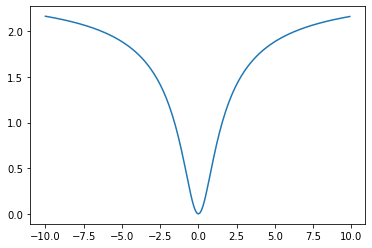

In [17]:
plt.plot(myx,f(myx))
plt.show()

### Part b ###

In [100]:
myx = np.arange(0.5,10,.1)

In [101]:
def g(x):
    return np.log(x)/x**2

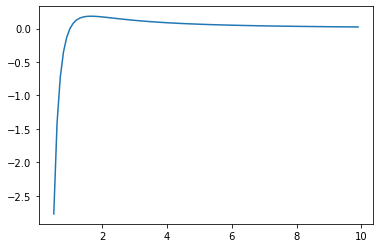

In [102]:
plt.plot(myx, g(myx))

## Problem 3 ##

In [21]:
mydata = np.load("jan8data.npy")

### Part a ###

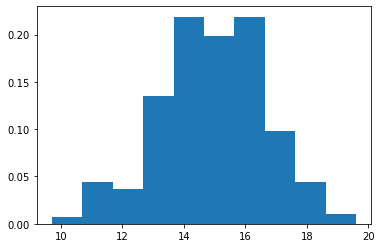

In [23]:
plt.hist(mydata, density=True)
plt.show()

### Part b ###

In [27]:
np.mean(mydata)

14.942329301785364

In [29]:
np.std(mydata)

1.7242887930982718

### Part c ###

In [25]:
def d(x):
    return (1/(1.724*np.sqrt(2*np.pi))) * np.exp((-1/2)*((x - 14.94)/1.724)**2)

In [28]:
np.pi

3.141592653589793

In [35]:
myx = np.arange(10,20,.1)

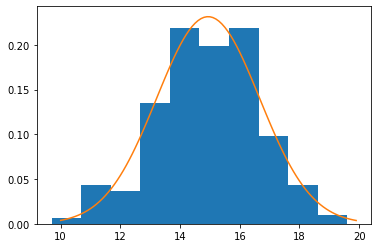

In [36]:
plt.hist(mydata, density=True)
plt.plot(myx, d(myx))
plt.show()

## Problem 4 ###

### Part a ###

In [38]:
def myf(x):
    return np.sin(x) + x - 1

In [39]:
myx = np.linspace(-5,5,100)

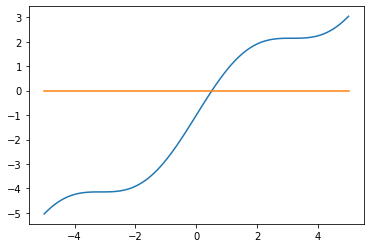

In [40]:
plt.plot(myx, myf(myx))
plt.plot([-5,5],[0,0])
plt.show()

### Part b ###

In [43]:
def mynewton(x0,n):
    for i in range(n):
        x0 =x0 - (np.sin(x0) + x0 - 1)/(np.cos(x0) + 1)
        print(x0)
    return x0

### Part c ###

In [45]:
mynewton(1.5,10)

0.1014355490108454
0.5011141383227441
0.510960915676762
0.5109734293681188
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692
0.5109734293885692


0.5109734293885692

## Problem 5 ##

## Part a ##

In [48]:
mydata = np.genfromtxt("https://raw.githubusercontent.com/aleahy-work/CS-STAT323-W24/main/jan8separate.csv", delimiter=",")

In [55]:
mydata[:5,:]

array([[ 2.68732827,  1.44073213,  1.98533201,  1.        ],
       [ 3.66818721,  0.7763507 ,  2.98772964,  1.        ],
       [ 2.18197402, -0.56420079,  1.66955275,  1.        ],
       [ 3.40543001,  1.97288659,  0.89189183,  1.        ],
       [ 3.43602137,  1.07664729,  1.45527268,  1.        ]])

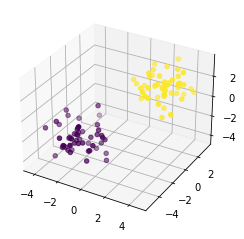

In [57]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(mydata[:,0].T, mydata[:,1].T,  mydata[:,2].T, c=mydata[:,3].T)

### Part b ###

In [76]:
w = np.zeros(4)
while True:
    m = 0
    for x in mydata:
        if x[3]*np.dot(w,x) <= 0:
            w = w + x[3]*x
            m = m + 1
    if m == 0:
        break

In [77]:
w

array([2.68732827, 1.44073213, 1.98533201, 1.        ])

In [78]:
def plane(x,y):
    return (-2.68732827*x - 1.44073213*y - 1)/1.98533201

In [67]:
myx = np.arange(-4,4,.1)
myy = np.arange(-4,4,.1)

In [70]:
xv, yv = np.meshgrid(myx ,myy)

In [79]:
myz = plane(xv,yv)

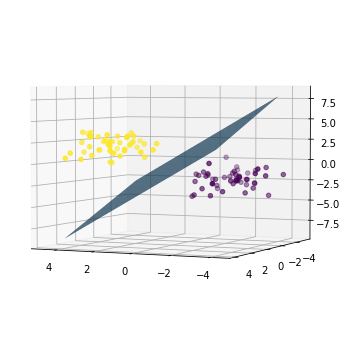

In [97]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv,yv, myz)
ax.scatter(mydata[:,0].T, mydata[:,1].T,  mydata[:,2].T, c=mydata[:,3].T)
ax.view_init(elev=3, azim=115, roll=0)  # this changes the view position to make it more clear
plt.show()